<a href="https://colab.research.google.com/github/tomos7231/pytorch_study/blob/main/code/Section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [2]:
torch.manual_seed(123)

In [3]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [4]:
device

'cuda'

# 線形回帰

In [5]:
a = 3
b = 2
x = torch.linspace(0, 5, 100).view(100, 1)
eps = torch.randn(100, 1)
y = a * x + b + eps

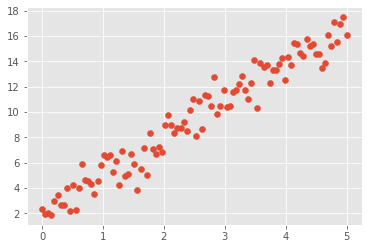

In [6]:
plt.scatter(x, y)

In [7]:
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features = 1, out_features = 1)

    def forward(self, x):
        output = self.linear(x)
        return output

In [8]:
model = LR()

In [9]:
x_test = torch.tensor([[1.0], [2.0]])
model(x_test)

tensor([[-0.6505],
        [-1.4166]], grad_fn=<AddmmBackward0>)

In [10]:
x2 = torch.linspace(0, 3, 100).view(100, 1)
x2.size()

torch.Size([100, 1])

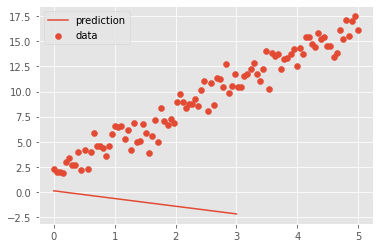

In [11]:
y_pred = model(x2)
plt.plot(x2, y_pred.detach(), label = 'prediction')
plt.scatter(x, y, label = 'data')
plt.legend()

In [12]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

In [13]:
losses = []
num_epoch = 500
for epoch in range(num_epoch):
    # 初期化
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    # 逆伝播
    loss.backward()
    # 更新
    optimizer.step()
    if epoch % 10 == 0:
        print("epoch: {}, loss: {}".format(epoch, loss.item()))
        losses.append(loss.item())

epoch: 0, loss: 156.7843017578125
epoch: 10, loss: 108.7425765991211
epoch: 20, loss: 75.52831268310547
epoch: 30, loss: 52.56508255004883
epoch: 40, loss: 36.68894958496094
epoch: 50, loss: 25.712505340576172
epoch: 60, loss: 18.12348175048828
epoch: 70, loss: 12.876379013061523
epoch: 80, loss: 9.248371124267578
epoch: 90, loss: 6.7397308349609375
epoch: 100, loss: 5.004981517791748
epoch: 110, loss: 3.805262565612793
epoch: 120, loss: 2.975445508956909
epoch: 130, loss: 2.4013638496398926
epoch: 140, loss: 2.0040884017944336
epoch: 150, loss: 1.7290524244308472
epoch: 160, loss: 1.5385342836380005
epoch: 170, loss: 1.4064483642578125
epoch: 180, loss: 1.3147625923156738
epoch: 190, loss: 1.2510120868682861
epoch: 200, loss: 1.206579327583313
epoch: 210, loss: 1.1755024194717407
epoch: 220, loss: 1.1536647081375122
epoch: 230, loss: 1.1382169723510742
epoch: 240, loss: 1.127191185951233
epoch: 250, loss: 1.1192245483398438
epoch: 260, loss: 1.1133769750595093
epoch: 270, loss: 1.1089

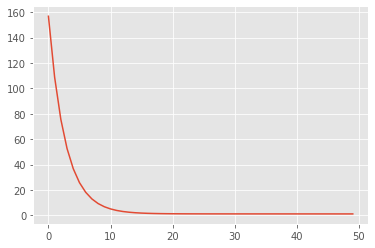

In [14]:
plt.plot(losses)

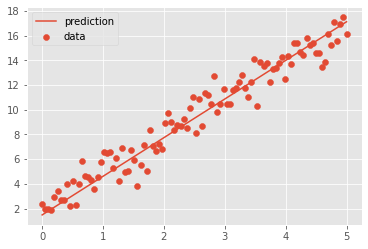

In [15]:
x_test = torch.linspace(0, 5, 100).view(100, 1)
y_test = model(x_test)
plt.plot(x_test, y_test.detach(), label = 'prediction')
plt.scatter(x, y, label = 'data')
plt.legend()

# MNIST

In [16]:
transform = transforms.Compose([
                                 transforms.ToTensor()
])
train_dataset = datasets.MNIST(root = "./data", train = True, download = True, transform = transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [17]:
num_batches = 100
train_dataloader = DataLoader(train_dataset, batch_size = num_batches, shuffle = True)

In [18]:
train_iter = iter(train_dataloader)
imgs, labels = train_iter.next()

In [19]:
imgs.size()

torch.Size([100, 1, 28, 28])

In [20]:
img = imgs[0]

In [21]:
# channel last
img_permute = img.permute(1, 2, 0)

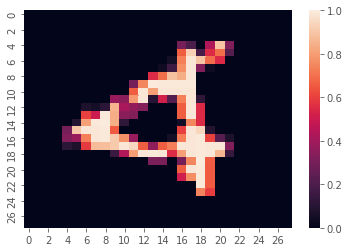

In [22]:
sns.heatmap(img_permute.numpy()[:, :, 0])

In [23]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(28 * 28, 400),
            nn.ReLU(inplace = True),
            nn.Linear(400, 200),
            nn.ReLU(inplace = True),
            nn.Linear(200, 100),
            nn.ReLU(inplace = True),
            nn.Linear(100, 10)
        )
    
    def forward(self, x):
        output = self.classifier(x)
        return output

In [24]:
model = MLP()
model.to(device)

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=200, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [26]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.view(num_batches, -1)
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))

epoch: 0, loss: 0.3136258683602015, acc: 0.9084338545799255
epoch: 1, loss: 0.1093222377790759, acc: 0.9665665626525879
epoch: 2, loss: 0.07255888667733719, acc: 0.9780327677726746
epoch: 3, loss: 0.05084575428937872, acc: 0.9837490320205688
epoch: 4, loss: 0.03785108832720046, acc: 0.9879657030105591
epoch: 5, loss: 0.031025055635836907, acc: 0.9896984100341797
epoch: 6, loss: 0.02572688219496437, acc: 0.9914652705192566
epoch: 7, loss: 0.022607041365263286, acc: 0.9926653504371643
epoch: 8, loss: 0.018967442340593454, acc: 0.9939650893211365
epoch: 9, loss: 0.01621225889365936, acc: 0.9945651292800903
epoch: 10, loss: 0.015618294046386533, acc: 0.9950489401817322
epoch: 11, loss: 0.014162256892923324, acc: 0.9952152967453003
epoch: 12, loss: 0.012569886269690566, acc: 0.9958490133285522
epoch: 13, loss: 0.011548005942765182, acc: 0.9962151050567627
epoch: 14, loss: 0.011187949416198535, acc: 0.9961655139923096


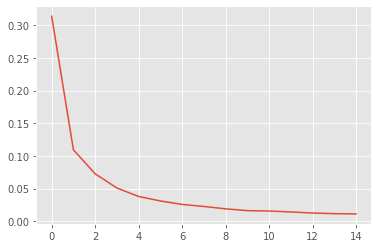

In [27]:
plt.plot(losses)

In [28]:
train_iter = iter(train_dataloader)
imgs, labels = train_iter.next()
labels

tensor([7, 2, 7, 4, 5, 2, 2, 5, 7, 7, 8, 5, 6, 4, 8, 0, 4, 0, 2, 9, 5, 2, 5, 6,
        7, 1, 3, 7, 5, 1, 7, 0, 0, 0, 7, 0, 4, 1, 9, 1, 8, 5, 1, 4, 0, 2, 6, 5,
        2, 9, 8, 1, 7, 1, 4, 4, 8, 3, 9, 3, 2, 5, 8, 1, 1, 7, 2, 7, 5, 5, 6, 9,
        6, 7, 5, 1, 8, 0, 1, 1, 8, 5, 3, 6, 2, 2, 4, 4, 0, 5, 3, 6, 4, 7, 9, 1,
        9, 1, 3, 0])

In [29]:
imgs_gpu = imgs.view(100, -1).to(device)
output = model(imgs_gpu)

In [30]:
prediction = torch.argmax(output, dim = 1)
prediction

tensor([7, 2, 7, 4, 5, 2, 2, 5, 7, 7, 8, 5, 6, 4, 8, 0, 4, 0, 2, 9, 5, 2, 5, 6,
        7, 1, 3, 7, 5, 1, 7, 0, 0, 0, 7, 0, 4, 1, 9, 1, 8, 5, 1, 4, 0, 2, 6, 5,
        2, 9, 8, 1, 7, 1, 4, 4, 8, 3, 9, 3, 2, 5, 8, 1, 1, 7, 2, 7, 5, 5, 6, 9,
        6, 7, 5, 1, 8, 0, 1, 1, 8, 5, 3, 6, 2, 2, 4, 4, 0, 5, 3, 6, 4, 7, 9, 1,
        9, 1, 3, 0], device='cuda:0')

In [31]:
params = model.state_dict()

In [32]:
torch.save(params, "model.prm")

In [33]:
param_load = torch.load("model.prm")

In [34]:
model.load_state_dict(param_load)

<All keys matched successfully>

# CNNによるCIFAR10の分類

In [68]:
val_transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5))
])

train_transform = transforms.Compose([
                                # ランダムに左右を入れ替える
                                transforms.RandomHorizontalFlip(),
                                # 画像の色調をランダムに変える
                                transforms.ColorJitter(),
                                # +-10度でランダムに回転
                                transforms.RandomRotation(10),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5))
])

train_dataset = datasets.CIFAR10(root = './data', train = True, download = True, transform = train_transform)
validation_dataset = datasets.CIFAR10(root = './data', train = False, download = True, transform = val_transform)

Files already downloaded and verified
Files already downloaded and verified


In [69]:
names = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [70]:
train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
validation_dataloader = DataLoader(validation_dataset, batch_size = 32, shuffle = False)

In [71]:
data_iter = iter(train_dataloader)

In [72]:
imgs, labels = data_iter.next()

In [73]:
labels

tensor([6, 5, 4, 7, 2, 4, 8, 6, 5, 8, 6, 8, 3, 7, 8, 5, 4, 6, 6, 3, 6, 0, 8, 4,
        0, 4, 4, 4, 3, 3, 6, 4])

In [74]:
imgs.size()

torch.Size([32, 3, 32, 32])

In [75]:
img = imgs[0]

In [76]:
img_permute = img.permute(1, 2, 0)

In [77]:
img_permute = 0.5 * img_permute + 0.5

In [78]:
img_permute = np.clip(img_permute, 0, 1)

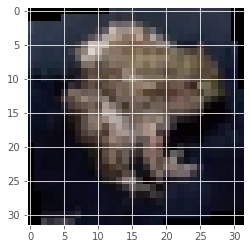

In [79]:
plt.imshow(img_permute)

In [80]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 5, padding = 2),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size = 2),
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding = 1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size = 2),
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, padding = 1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size = 2),
            nn.Conv2d(in_channels = 256, out_channels = 128, kernel_size = 3, padding = 1),
            nn.ReLU(inplace = True)
        )
        self.classifier = nn.Linear(4*4*128, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [81]:
model = CNN(10)
model.to(device)

CNN(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
  )
  (classifier): Linear(in_features=2048, out_features=10, bias=True)
)

In [82]:
criterion = nn.CrossEntropyLoss()
# weight_decay：L2正則化
optimizer = optim.Adam(model.parameters(), lr = 0.001, weight_decay = 5e-4)

In [83]:
num_epochs = 15
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        loss.backward()
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.sum(pred == labels.data)/32
        optimizer.step()
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)
    #
    # validation loop
    #
    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = model(val_imgs)
        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc += torch.sum(val_pred == val_labels.data)/32
    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)
    print("epoch: {}, loss: {}, acc: {}, \
     val loss: {}, val acc: {}".format(epoch, running_loss, running_acc, val_running_loss, val_running_acc))

epoch: 0, loss: 1.4469825888549526, acc: 0.4704294502735138,      val loss: 1.1719631823107077, val acc: 0.5778753757476807
epoch: 1, loss: 1.0384738340220692, acc: 0.6309781074523926,      val loss: 0.9384103007971669, val acc: 0.6723242402076721
epoch: 2, loss: 0.8759518776348746, acc: 0.6947576999664307,      val loss: 0.7961391707578787, val acc: 0.7233426570892334
epoch: 3, loss: 0.7880761210955036, acc: 0.7237284183502197,      val loss: 0.7579917499242118, val acc: 0.7329273223876953
epoch: 4, loss: 0.7304075828307116, acc: 0.7464011311531067,      val loss: 0.7247256370969474, val acc: 0.7480031847953796
epoch: 5, loss: 0.6892391582635146, acc: 0.7619961500167847,      val loss: 0.7238405761056053, val acc: 0.7502995133399963
epoch: 6, loss: 0.6601492230680914, acc: 0.7698136568069458,      val loss: 0.6750604512211614, val acc: 0.7655750513076782
epoch: 7, loss: 0.6362859002592772, acc: 0.7776511311531067,      val loss: 0.6792469439795985, val acc: 0.7661741375923157
epoch: 8

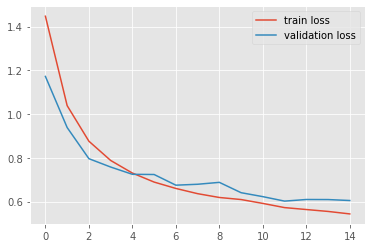

In [84]:
plt.plot(losses, label = 'train loss')
plt.plot(val_losses, label = 'validation loss')
plt.legend()

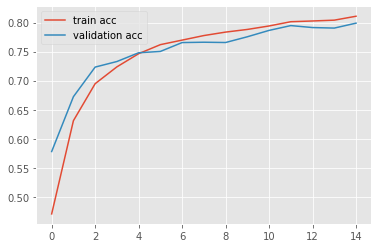

In [85]:
for i in range(num_epochs):
    accs[i] = accs[i].to('cpu').numpy()
    val_accs[i] = val_accs[i].to('cpu').numpy()

plt.plot(accs, label = 'train acc')
plt.plot(val_accs, label = 'validation acc')
plt.legend()